# Lab 6: Convolutional neural networks (CNNs)

## 6.1. Basic architecture

* A convolutional neural network is composed of two types parts: a feature detection part and a classification part.

**Feature learning part**
* This part is mainly composed of:
    * Convolutional layers. 
    * Pooling layers.
* These layers intend to extract and detect features in the image.

**Classification part**
* The classification part is composed of:
    * A flatten layer as a result of the feature learning part.
    * A fully connected layer (FC) that outputs a vector of K dimensions where K is the number of classes that the network will be able to predict. This vector contains the probabilities for each class of any image being classified.
    * A final layer that uses a softmax function to provide the classification output.

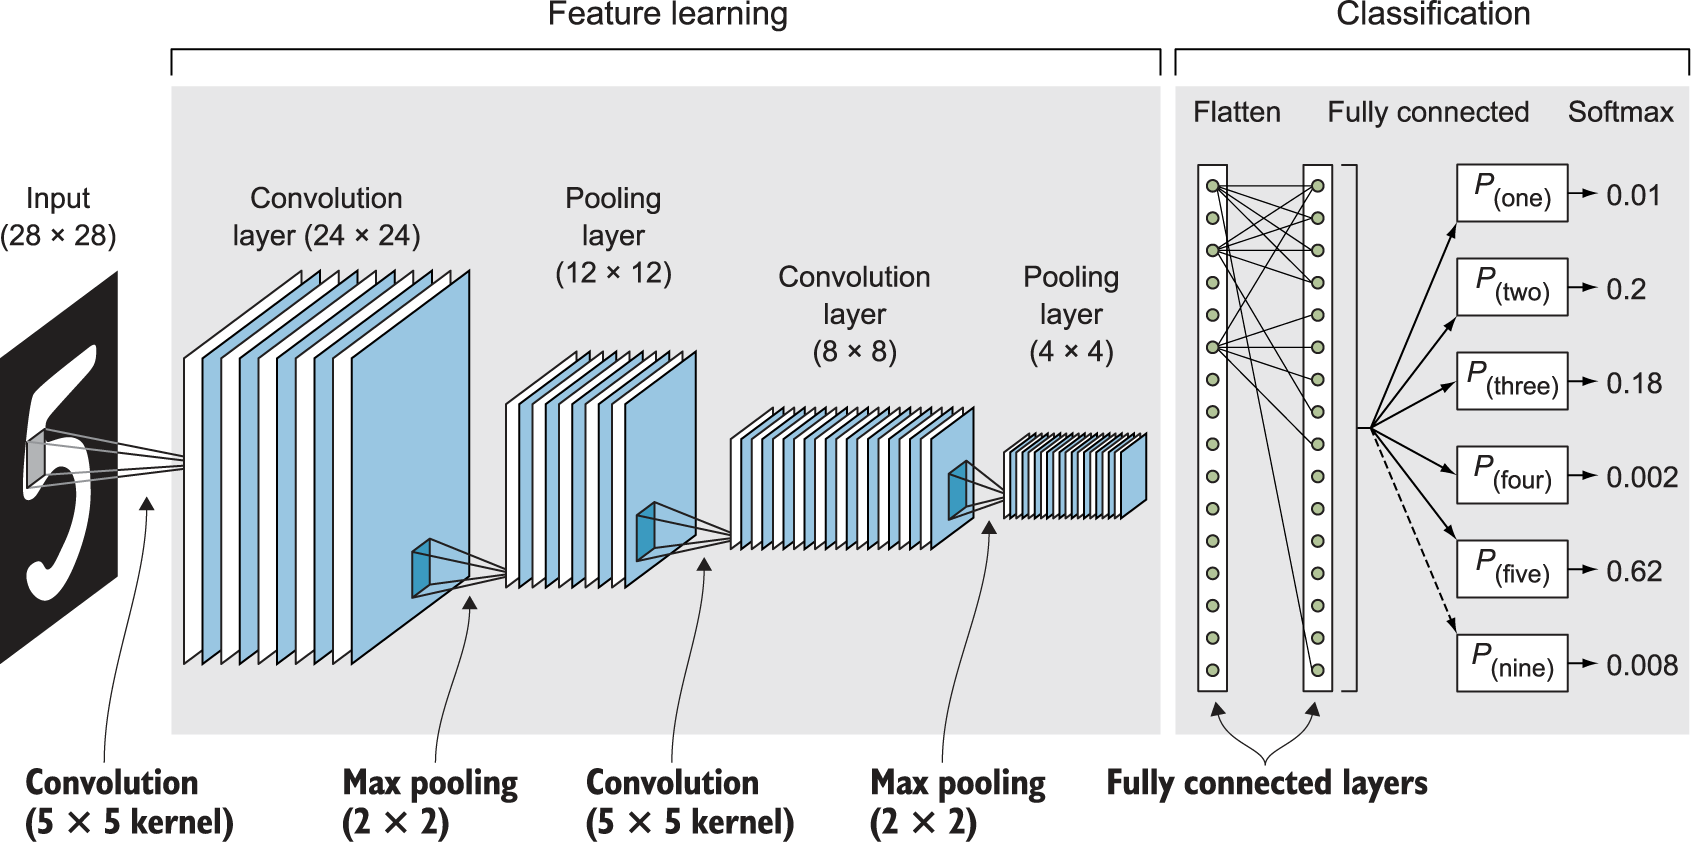

## 6.2. Convolutional layer

* A convolutional layer is composed by filters that include trainable parameters.
* Over the course of training, the filters will learn to detect certain features, like edges and textures, in the input image.

###  6.2.1. Basic functioning

* __Input feature map__
    - Our input data is a 2D matrix calle the *input feature map*. 
    - The feature map is initially our image data.
    - In subsequent layers it represents a mapping of where a certain kind of feature is found in the image, hence the name.
* __Filters__
    - A filter is composed at least by a _kernel_, which is simply a small matrix of weights, usually 3x3.
* __Applying the convolution operation__
    - The kernel “slides” over the 2D input data, performing an elementwise multiplication with the part of the input it is currently on, and then summing up the results into a single output pixel.
 
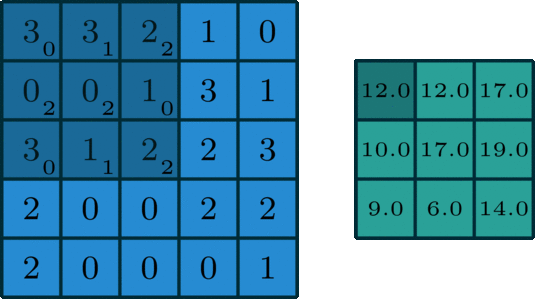

### 6.2.2 Padding

* The convolution operaton shrinks the feature map
* If you want to get an output feature map with the same spatial dimensions as the input, you can use **padding**.  
* Padding consists of adding an appropriate number of rows and columns on each side of the input feature map so as to make it possible to fit center convolution windows around every input tile. 
* For a 3 x 3 kernel over a 5 x 5 input, you add one column on the right, one column on the left, one row at the top, and one row at the bottom.

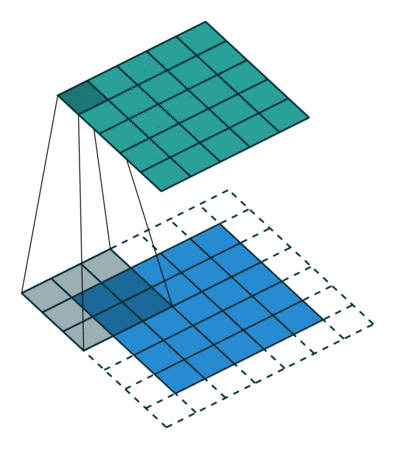

### 6.2.3 Strides

* Our description of convolution so far has assumed that the center tiles of the convolution windows are all contiguous. 
* But the distance between two successive windows is a parameter of the convolution, called its **stride** (*paso, zancada* in spanish)
* The previous convolutions have the stride to 1 (default stride or no stride).
* Using stride 2 means the width and height of the feature map are downsampled by a factor of 2 (in addition to any changes induced by border effects).
* Strided convolutions are rarely used in classification models, but they come in handy for some other types of models.

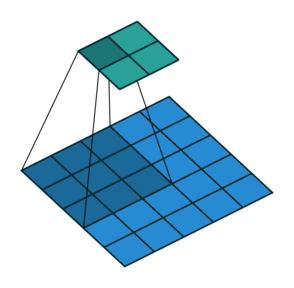

### 6.2.4. Multichannel images and multifilters

__Multichannel images and filters__
* In practicality, most input images have 3 channels for the three basic colors (red, blue and green).
* When applying a filter to a multichanneled image we will have a different kernel for each channel (i.e. the filters have depth dimension).
* So one filter is composed of several kernel (one for each of the depth layers in the feature map).

__Multifilters__
* In an image we apply not only one filter but several filters at the same time.
* The result of a convolution will be a new feature map, with dimensions probably reduced with respect to the original, and with a depth corresponding to the number of filters applied.

__Example__
* Input: a multichannel image.
* Applied two filters (with three kernels).
* Output: A new feature map, with dimensions reduced and with a depth that is equal to the number of filters applied.

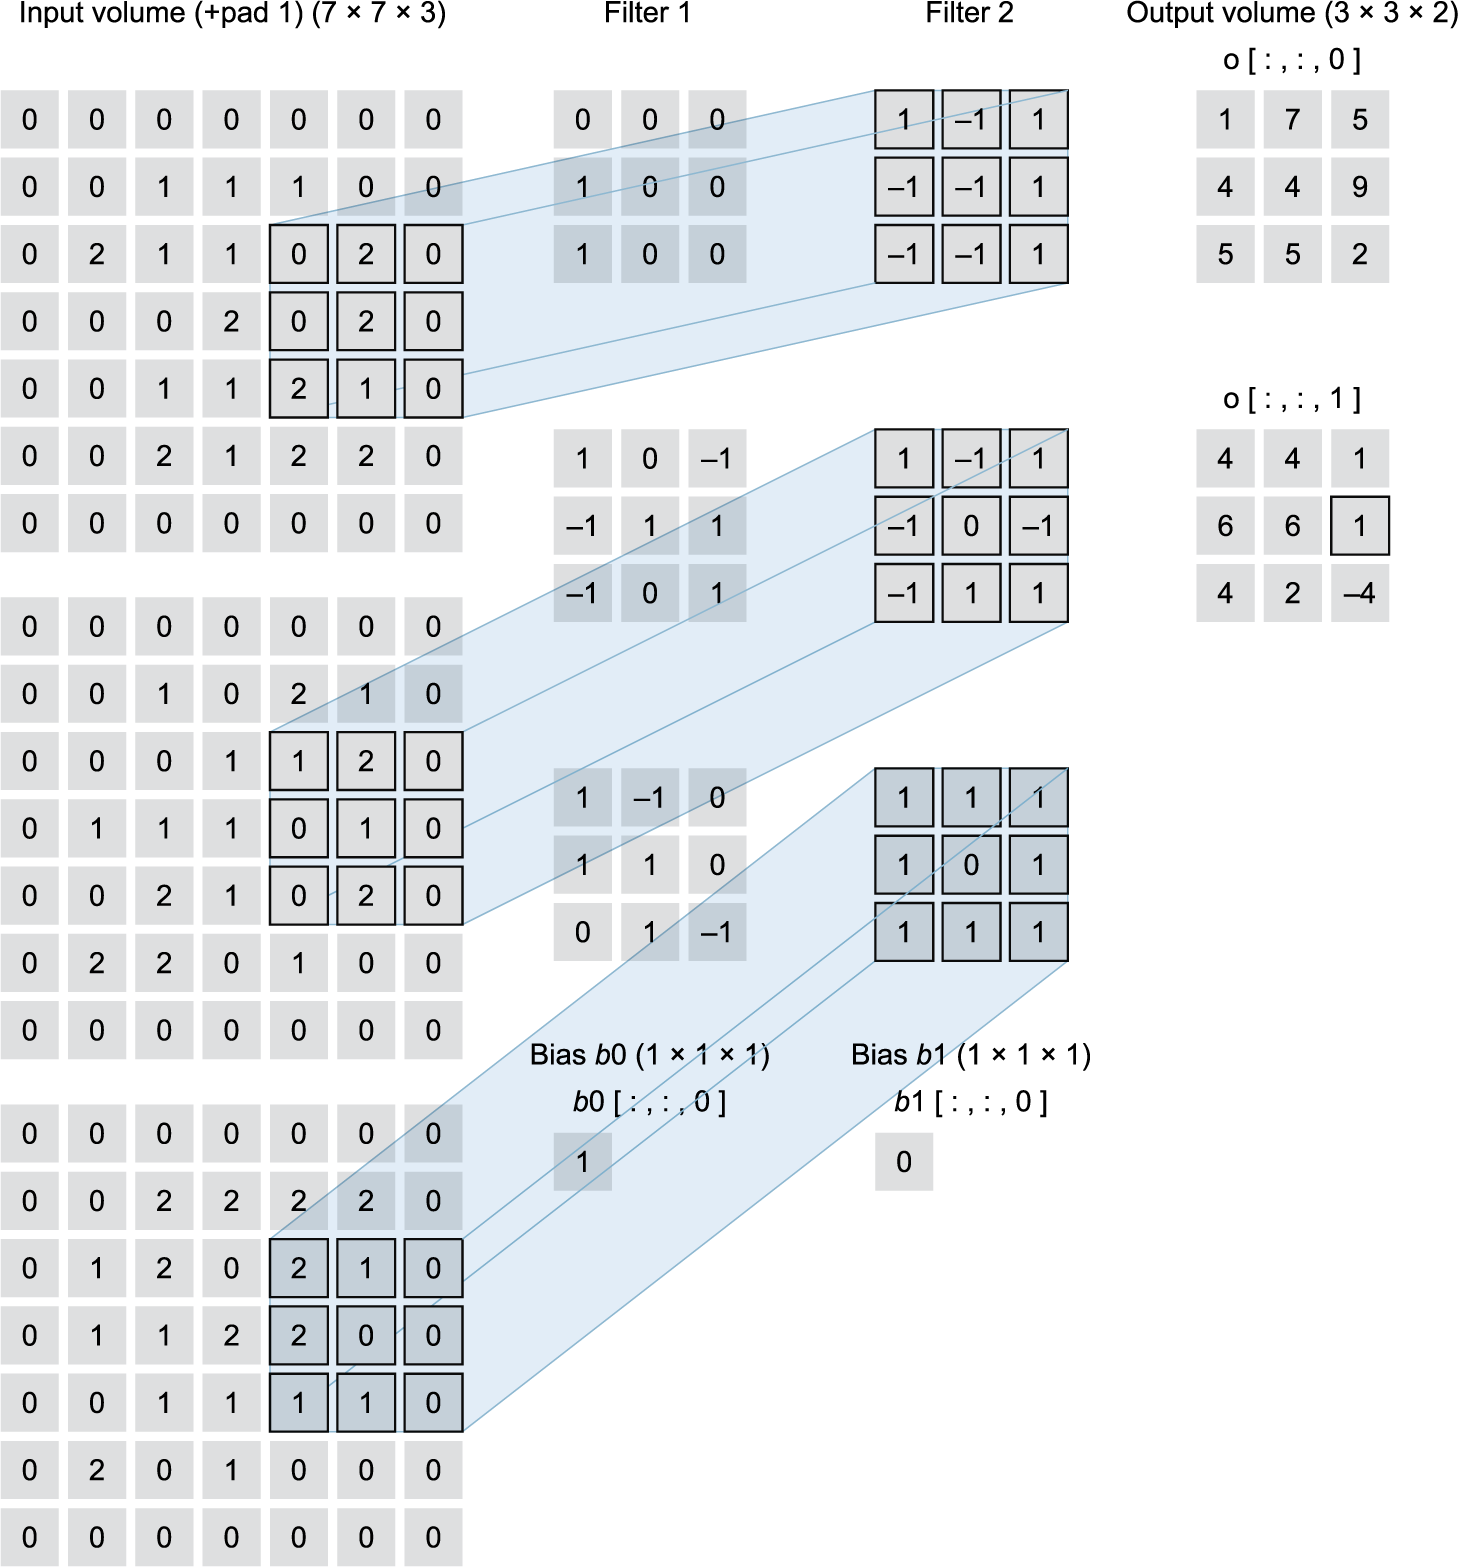

### 6.2.5. Convolutions in Keras

* __Convolutional classes__
    - A convolution layer is implemented in Keras using several classes: https://keras.io/api/layers/convolution_layers/
    - The most used is the two-dimensional convolution represented by the `Conv2D` class: https://keras.io/api/layers/convolution_layers/convolution2d/

* __`Conv2D` class main parameters__
  - __`filters`__: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution)
  - __`kernel_size`__: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.
  - __`padding`__: one of `"valid"` or `"same"` (case-insensitive). `"valid"` means no padding. `"same"` results in padding with zeros evenly to the left/right or up/down of the input. When `padding="same" and strides=1, the output has the same size as the input.
  - __`strides`__: An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions.
  - __`activation`__: Activation function to use. If you don't specify anything, no activation is applied


In [1]:
import keras
import numpy as np

x = np.random.rand(4, 10, 10, 128)
y = keras.layers.Conv2D(filters=32, 
                        kernel_size=3, 
                        padding="valid", 
                        strides=1,
                        activation='relu')(x)
print(y.shape)

(4, 8, 8, 32)


## 6.3. Pooling layer

### 6.3.1 Basic functioning

* Pooling operations reduce the size of feature maps by using some function to summarize subregions, such as taking the average or the maximum value (the most common one).
* Pooling works by sliding a window across the input and feeding the content of the window to a pooling function.
* __Comparison with convolutions__
    - Unlike convolutions, pooling layers do not include trainable parameters.
    - In pooling we do not specify the number of filters because the number of output filters is the same as the number of input filters (the pooling operation is applied independently to each filter).

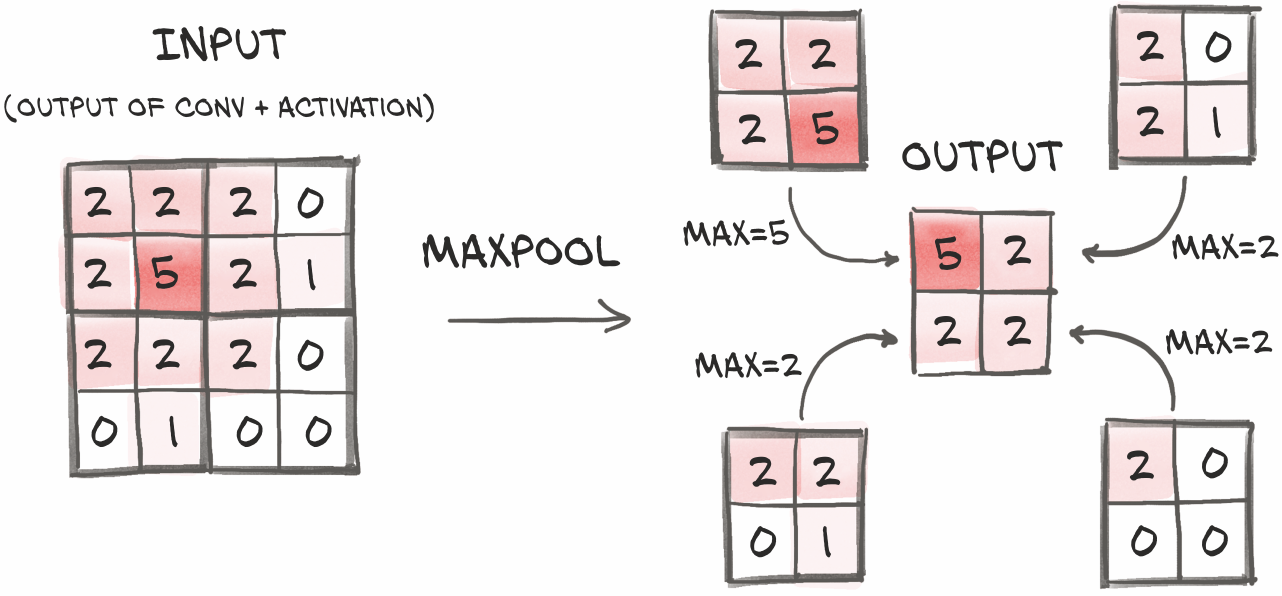


* **The reason to use downsampling by pooling is**:
  * To reduce the number of feature-map coefficients to process.
  * To induce spatial-filter hierarchies by making successive convolution layers look at increasingly large windows (in terms of the fraction of the original input they cover).
* Combined, convolutions and pooling can help the model to recognize larger structures in the image.

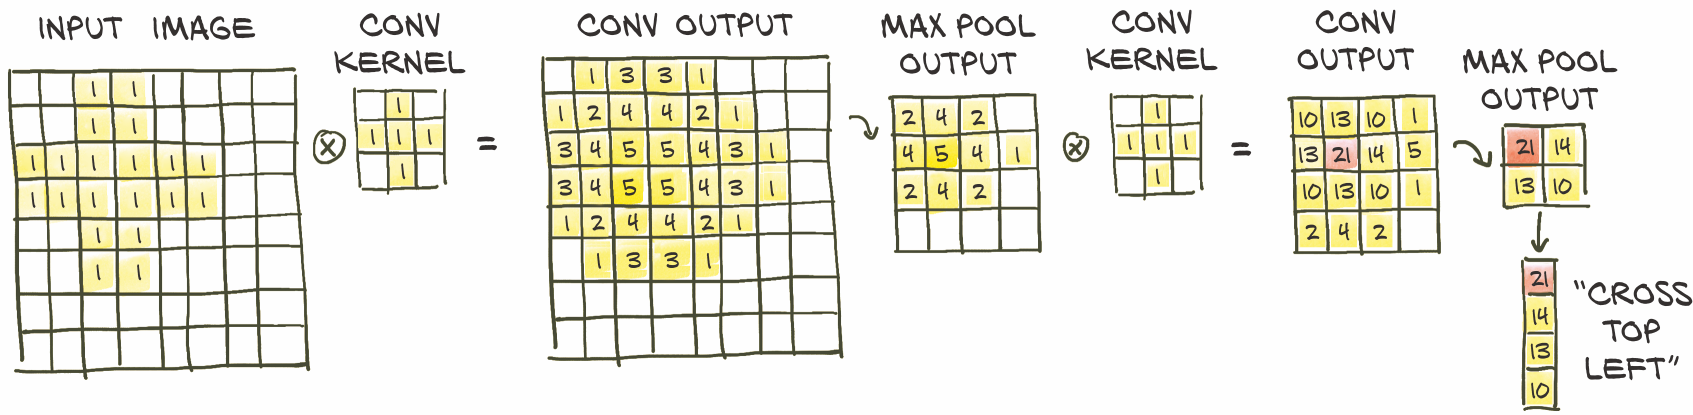

### 6.3.2. Pooling layers in Keras

* __Pooling classes__
    - A pooling layer is implemented in Keras using several classes: https://keras.io/api/layers/pooling_layers/
    - The most used is the two-dimensional max pooling layer represented by the `MaxPooling2D` class: https://keras.io/api/layers/pooling_layers/max_pooling2d/
*  __`MaxPooling2D` class main parameters__
    - __`pool_size`__: Integer or tuple of 2 integers, window size over which to take the maximum. (2, 2) will take the max value over a 2x2 pooling window. If only one integer is specified, the same window length will be used for both dimensions.
    - __`padding`__: One of `"valid"` or `"same"` (case-insensitive). `"valid"` means no padding. `"same"` results in padding evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.
    - __`strides`__: Integer, tuple of 2 integers, or None. Strides values. Specifies how far the pooling window moves for each pooling step. If `None`, it will default to `pool_size`.

In [2]:
# strides=(1, 1) and padding="valid"
x = np.array([[1., 2., 3.],
              [4., 5., 6.],
              [7., 8., 9.]])
x = np.reshape(x, [1, 3, 3, 1])
max_pool_2d = keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(1, 1), 
    padding="valid")
max_pool_2d(x)

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[5.],
         [6.]],

        [[8.],
         [9.]]]], dtype=float32)>

In [3]:
# strides=(2, 2) and padding="valid"
x = np.array([[1.,  2.,  3.,  4.],
              [5.,  6.,  7.,  8.],
              [9., 10., 11., 12.]])
x = np.reshape(x, [1, 3, 4, 1])
max_pool_2d = keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2), 
    padding="valid")
max_pool_2d(x)

<tf.Tensor: shape=(1, 1, 2, 1), dtype=float32, numpy=
array([[[[6.],
         [8.]]]], dtype=float32)>

In [4]:
# stride=(1, 1) and padding="same"
x = np.array([[1., 2., 3.],
              [4., 5., 6.],
              [7., 8., 9.]])
x = np.reshape(x, [1, 3, 3, 1])
max_pool_2d = keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(1, 1), 
    padding="same")
max_pool_2d(x)

<tf.Tensor: shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[5.],
         [6.],
         [6.]],

        [[8.],
         [9.],
         [9.]],

        [[8.],
         [9.],
         [9.]]]], dtype=float32)>

## 6.5. Our CNN first example (MNIST)

* First, let’s take a look at a simple convnet example that classifies MNIST digits.
* We’ll build the model using the Keras Functional API.

### 6.5.1. Instantiating a small CNN

* __Input__
  - A CNN takes as input tensors of shape `(image_height, image_width, image_channels)`, not including the batch dimension. 
  - In this case, we’ll configure the CNN to process inputs of size `(28, 28, 1)`, which is the format of MNIST images.

* __Feature detection layers__
  - Our feature detection layers is a stack of `Conv2D` and `MaxPooling2D` layers.
  - We can see that the output of every `Conv2D` and `MaxPooling2D` layer is a rank-3 tensor of shape (height, width, channels). 
  - The width and height dimensions tend to shrink as you go deeper in the model. 
  - The number of channels is controlled by the first argument (`filters`) passed to the `Conv2D` layers (32, 64, or 128).
  - After the last `Conv2D` layer, we end up with an output of shape (3, 3, 128)—a 3 × 3 feature map of 128 channels. 

* __Feature map evolution__

* The __size of the feature map__ decreases through the layers because we use pooling or strides (or we don`t use the "same" padding).
    - The reason of downsampling the feature map is useful to reduce the number of  coefficients to process and to look at increasingly large windows of the original image.
* The __depth of the feature__ map progressively increases in the model, we have more filters in the final layers than in the initial layers.
    - Every layer of filters is there to capture patterns.
    - The first layer of filters captures basic patterns like edges, corners, dots etc.
    - Subsequent layers combine those patterns to make bigger patterns (like combining edges to make squares, circles, etc.).
    - Now as we move forward in the layers, the patterns get more complex; hence there are larger combinations of patterns to capture, and we need more filters to do that.
* At the end of the feature detection layers we will end up with a long tube of small shaped images that contain all the features in the original image.

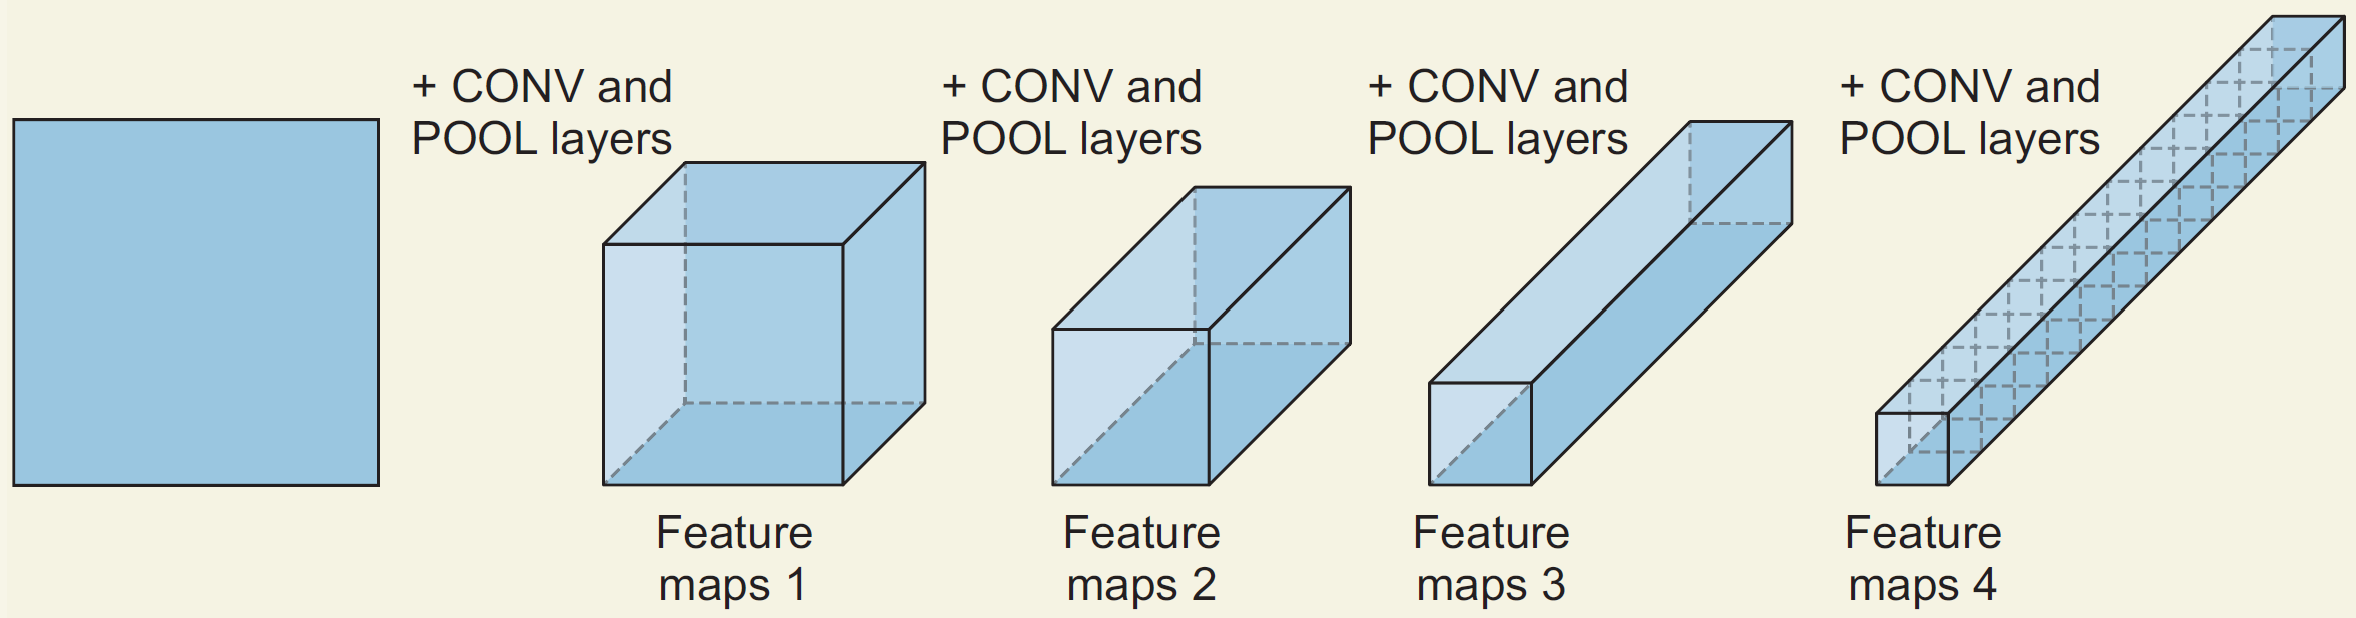

* __Classification layers__
  - The next step is to feed this output into a densely connected classifier like those we’re already familiar with: a stack of `Dense` layers. 
  - These classifiers process vectors, which are 1D, whereas the current output is a rank-3 tensor. To bridge the gap, we flatten the 3D outputs to 1D with a `Flatten` layer before adding the `Dense` layers.
  - Finally, we do 10-way classification, so our last layer has 10 outputs and a `softmax` activation.

In [5]:
import keras
from keras import layers
inputs = keras.Input(shape=(28, 28, 1))

# Feature learning part
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)

# Classification part
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

### 6.5.2. Displaying the model's summary

In [6]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

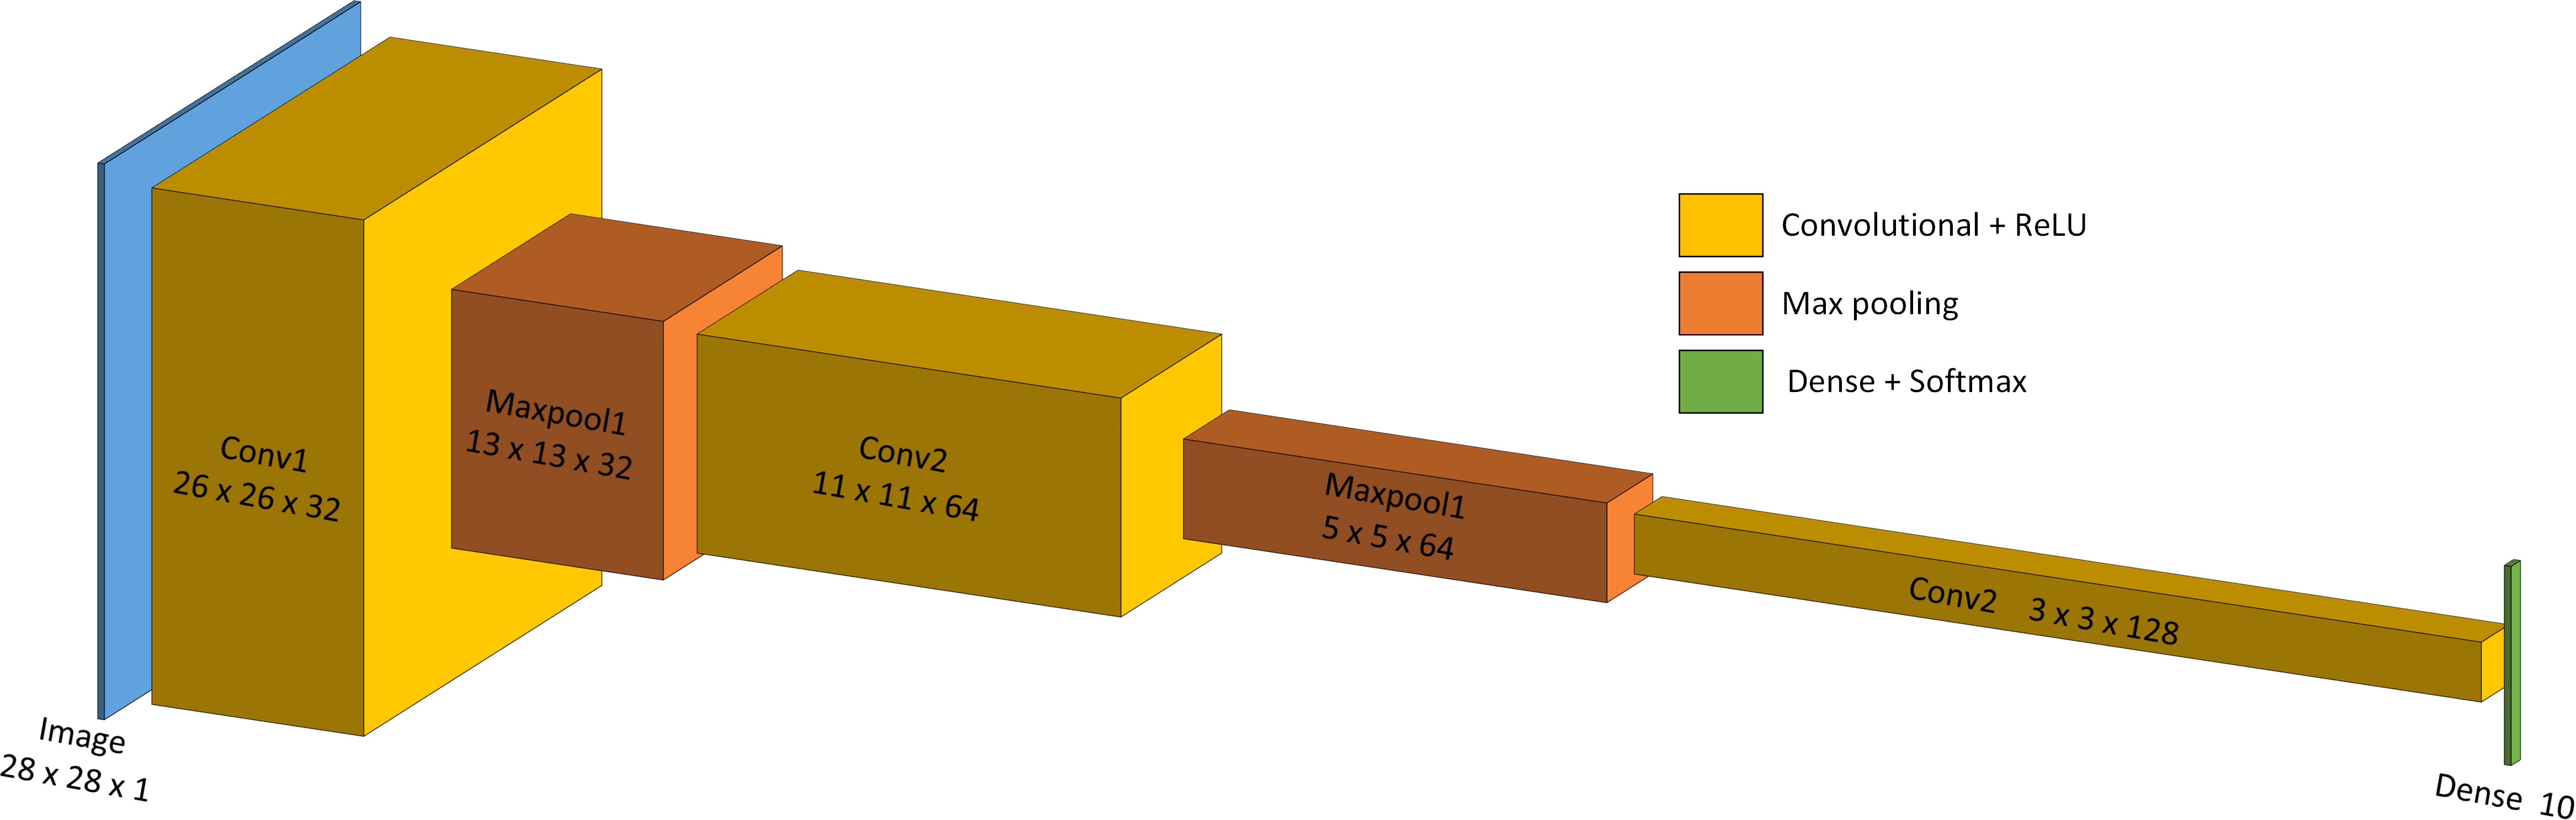

### 6.5.3. Training the CNN on MNIST images

* Let’s train the convnet on the MNIST digits. 
* Because we’re doing 10-way classification with a softmax output, we’ll use the categorical crossentropy loss
* Because our labels are integers, we’ll use the sparse version, `sparse_categorical_crossentropy`.

In [7]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8842 - loss: 0.3703
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9853 - loss: 0.0486
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9903 - loss: 0.0307
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9932 - loss: 0.0227
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9956 - loss: 0.0155


### 6.5.4. Evaluating the CNN

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9889 - loss: 0.0324
Test accuracy: 0.991


* Whereas the densely connected model had a test accuracy of 97.8%, the basic convnet has a test accuracy of 99.1%
<!-- * We decreased the error rate by about 60% (relative). -->